In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the CSV file
file_path_pixel = '/home/vijayaditya/Downloads/1-s2.0-S0019103523004773-mmc3.csv'
data_pixel = pd.read_csv(file_path_pixel)

# Strip column names for easier access
data_pixel.columns = data_pixel.columns.str.strip()

# Define Moon's radius in kilometers
moon_radius_km = 1737  # kilometers

# Function to calculate dimensions and area in km²
def calculate_dimensions_km(row):
    """
    Calculates width, height, and area for a pixel in kilometers.
    """
    # Average latitude for more accurate conversion of longitude degrees to distance
    avg_latitude = np.mean([row['V0_LATITUDE'], row['V1_LATITUDE'], row['V2_LATITUDE'], row['V3_LATITUDE']])
    
    # Calculate distances per degree for latitude and longitude
    dist_lat_km = (2 * np.pi * moon_radius_km) / 360  # Distance per degree of latitude in km
    dist_lon_km = dist_lat_km * np.cos(np.radians(avg_latitude))  # Adjust for latitude
    
    # Calculate width and height in km
    width_km = abs(row['V0_LONGITUDE'] - row['V2_LONGITUDE']) * dist_lon_km
    height_km = abs(row['V0_LATITUDE'] - row['V1_LATITUDE']) * dist_lat_km
    
    # Calculate area in km²
    area_km2 = width_km * height_km
    
    return pd.Series({'Width_km': width_km, 'Height_km': height_km, 'Area_km2': area_km2})

# Apply the function to the dataset
dimensions_km = data_pixel.apply(calculate_dimensions_km, axis=1)

# Add calculated dimensions to the dataset
data_pixel = pd.concat([data_pixel, dimensions_km], axis=1)

# Save or display the dataset
output_file_path = '/home/vijayaditya/Downloads/lunar_image_dimensions_km.csv'
data_pixel.to_csv(output_file_path, index=False)

# Print the first few rows of the updated dataset
print("Updated dataset saved to:", output_file_path)
print(data_pixel.head())


Updated dataset saved to: /home/vijayaditya/Downloads/lunar_image_dimensions_km.csv
   V0_LATITUDE  V0_LONGITUDE  V1_LATITUDE  V1_LONGITUDE  V2_LATITUDE  \
0       -44.76        120.40       -50.51        120.50       -50.49   
1       -54.45        120.57       -60.20        120.72       -60.17   
2       -59.29        120.69       -65.04        120.88       -65.01   
3        49.72        116.61        44.01        116.85        44.02   
4        44.83        116.82        39.11        117.01        39.13   

   V2_LONGITUDE  V3_LATITUDE  V3_LONGITUDE  MG_WT  MG_FIT_UNC  ...  \
0        121.91       -44.74        121.66   4.09        0.20  ...   
1        122.53       -54.43        122.12   3.71        0.35  ...   
2        123.02       -59.27        122.45   4.81        0.58  ...   
3        117.99        49.74        117.88   5.09        1.62  ...   
4        118.07        44.85        117.97   6.40        1.59  ...   

   SI_FIT_UNC  SI_SYS_UNC  SI_TOT_UNC  FE_WT  FE_FIT_UNC  FE_S

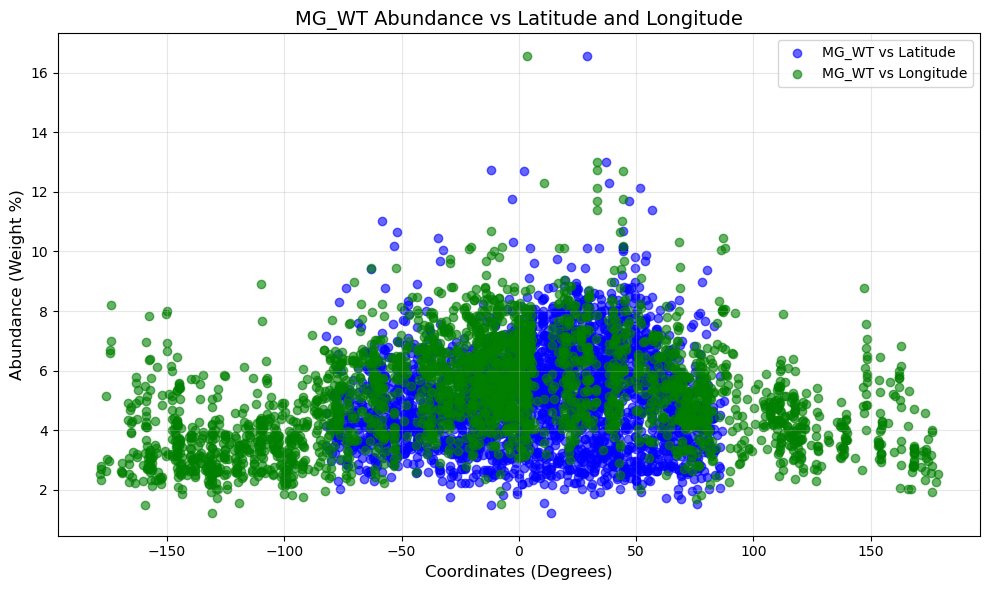

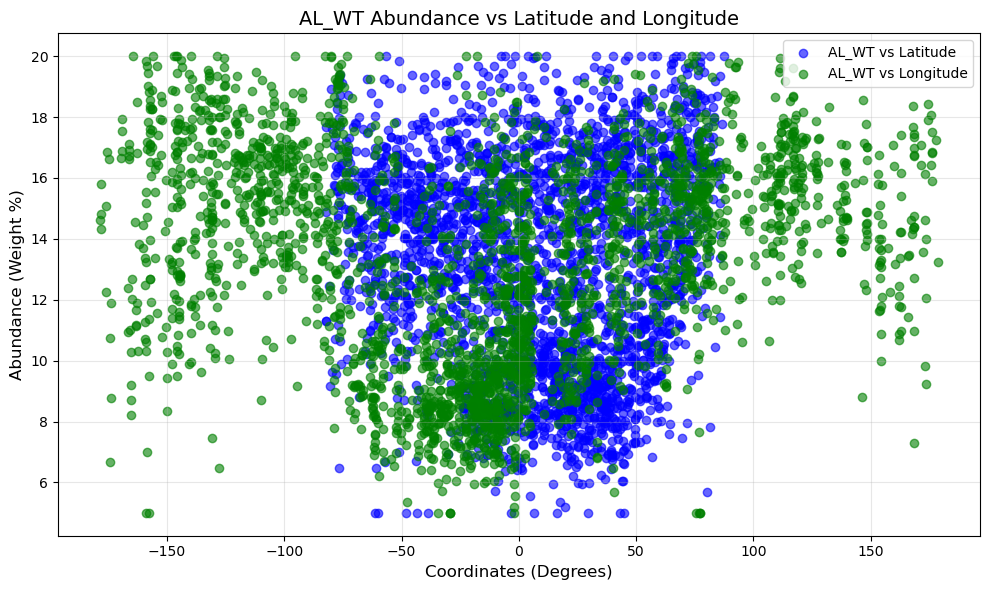

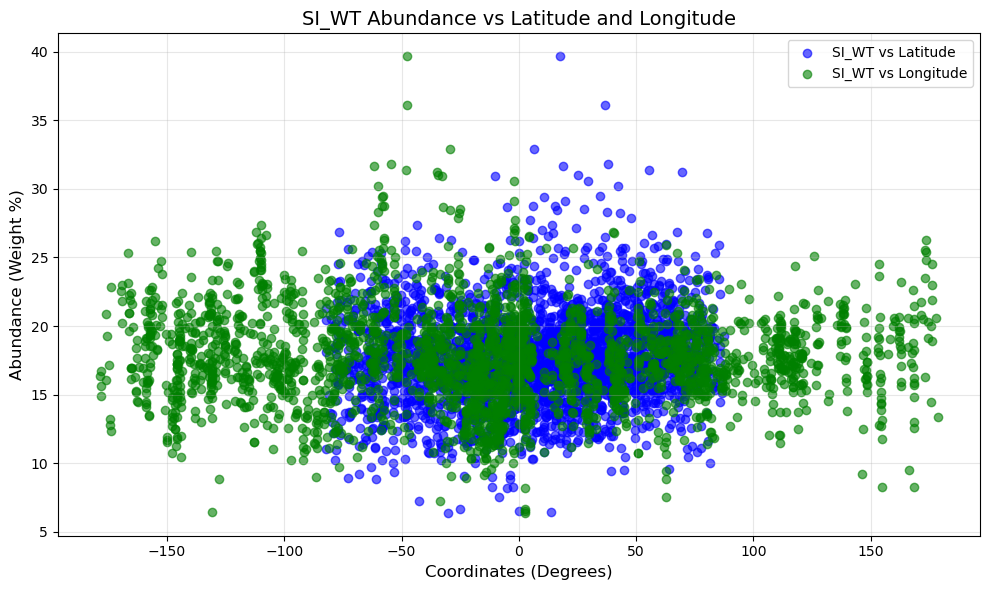

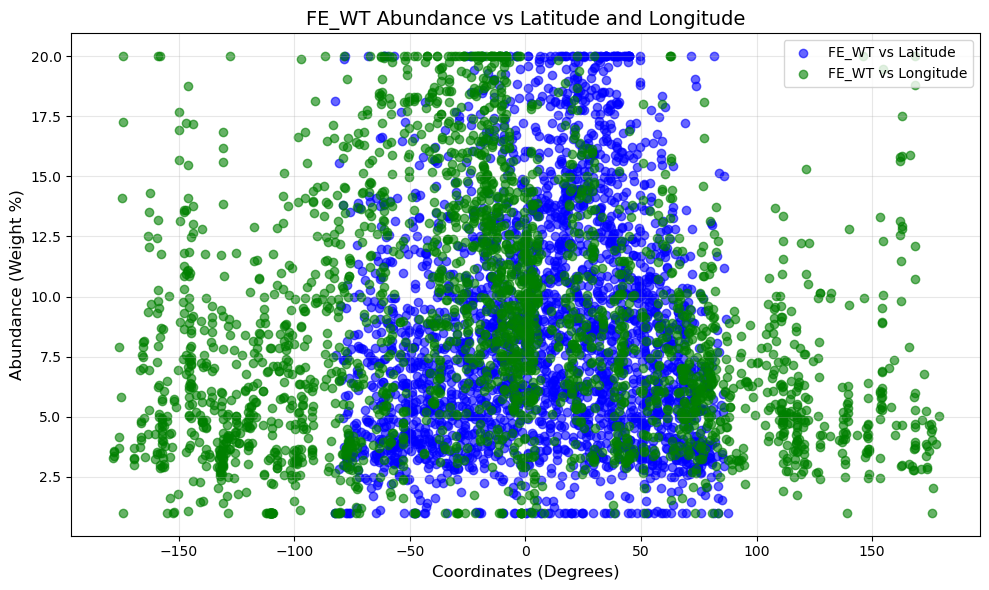

In [6]:
# Re-import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path_pixel = '/home/vijayaditya/Downloads/1-s2.0-S0019103523004773-mmc3.csv'
data_pixel = pd.read_csv(file_path_pixel)

# Strip column names for easier access
data_pixel.columns = data_pixel.columns.str.strip()

# List of elements to plot
elements = ['MG_WT', 'AL_WT', 'SI_WT', 'FE_WT']

# Loop through each element and plot it against latitude and longitude
for element in elements:
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for latitude vs. element abundance
    plt.scatter(data_pixel['V0_LATITUDE'], data_pixel[element], c='blue', alpha=0.6, label=f'{element} vs Latitude')
    
    # Scatter plot for longitude vs. element abundance
    plt.scatter(data_pixel['V0_LONGITUDE'], data_pixel[element], c='green', alpha=0.6, label=f'{element} vs Longitude')
    
    # Add labels and title
    plt.title(f"{element} Abundance vs Latitude and Longitude", fontsize=14)
    plt.xlabel("Coordinates (Degrees)", fontsize=12)
    plt.ylabel("Abundance (Weight %)", fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [11]:
# Ensure necessary libraries are imported
from mpl_toolkits.basemap import Basemap

# List of elements to plot
elements = ['MG_WT', 'AL_WT', 'SI_WT', 'FE_WT']

# Colors for elements
colors = ['r', 'g', 'b', 'm']

# Latitude and longitude columns from the dataset
latitudes = data['V0_LATITUDE']
longitudes = data['V0_LONGITUDE']

# Loop through each element and plot a separate map
for element in elements:
    plt.figure(figsize=(12, 8))
    
    # Create a Basemap instance
    lunar_map = Basemap(projection='cyl', resolution='l',
                        llcrnrlat=max(-90, min(latitudes)-5), urcrnrlat=min(90, max(latitudes)+5),
                        llcrnrlon=max(-180, min(longitudes)-5), urcrnrlon=min(180, max(longitudes)+5))
    
    # Draw map features
    lunar_map.drawcoastlines(color='gray', linewidth=0.5)
    lunar_map.drawparallels(range(-90, 91, 10), labels=[1, 0, 0, 0], fontsize=10, color='gray', linewidth=0.5)
    lunar_map.drawmeridians(range(-180, 181, 10), labels=[0, 0, 0, 1], fontsize=10, color='gray', linewidth=0.5)
    
    # Plot the data for the current element
    sc = lunar_map.scatter(longitudes, latitudes, c=data[element], cmap='viridis', s=20, alpha=0.7)
    
    # Add colorbar and title
    plt.colorbar(sc, label=f'{element} Abundance (Weight %)')
    plt.title(f"Lunar Surface Element Abundance: {element}", fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [9]:
pip install basemap-data


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [10]:
pip install basemap


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [12]:
pip install cartopy


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [13]:
python3 -m venv cartopy_env


SyntaxError: invalid syntax (2316019794.py, line 1)

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

# Assuming data is already loaded in `data` with the required columns
# List of elements to plot
elements = ['MG_WT', 'AL_WT', 'SI_WT', 'FE_WT']

# Latitude and longitude columns
latitudes = data['V0_LATITUDE']
longitudes = data['V0_LONGITUDE']

# Loop through each element and create a map
for element in elements:
    plt.figure(figsize=(12, 8))
    
    # Create a map with Cartopy
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    
    # Scatter plot of elemental abundance
    scatter = ax.scatter(
        longitudes, latitudes, c=data[element], cmap='viridis', s=20, transform=ccrs.PlateCarree()
    )
    
    # Add colorbar and labels
    cbar = plt.colorbar(scatter, orientation='vertical', pad=0.05, ax=ax)
    cbar.set_label(f'{element} Abundance (Weight %)', fontsize=12)
    plt.title(f"Lunar Elemental Map: {element} Abundance", fontsize=14)
    plt.xlabel("Longitude (Degrees)", fontsize=12)
    plt.ylabel("Latitude (Degrees)", fontsize=12)
    
    # Show the map
    plt.tight_layout()
    plt.show()


ModuleNotFoundError: No module named 'cartopy'

In [4]:
# Define latitude bins
latitude_bins = pd.cut(latitudes, bins=10, labels=False)

# Calculate mean Mg abundance for each latitude bin
mg_trends_by_latitude = data.groupby(latitude_bins)['MG_WT'].mean()

# Create a bar plot to visualize Mg trends across latitude bins
plt.figure(figsize=(12, 8))
mg_trends_by_latitude.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title("Magnesium (Mg) Abundance Trends Across Latitude Bins", fontsize=16)
plt.xlabel("Latitude Bins", fontsize=14)
plt.ylabel("Average Mg Abundance (Weight %)", fontsize=14)
plt.xticks(ticks=range(len(mg_trends_by_latitude)), labels=[f"Bin {i+1}" for i in range(len(mg_trends_by_latitude))], rotation=45)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


NameError: name 'latitudes' is not defined

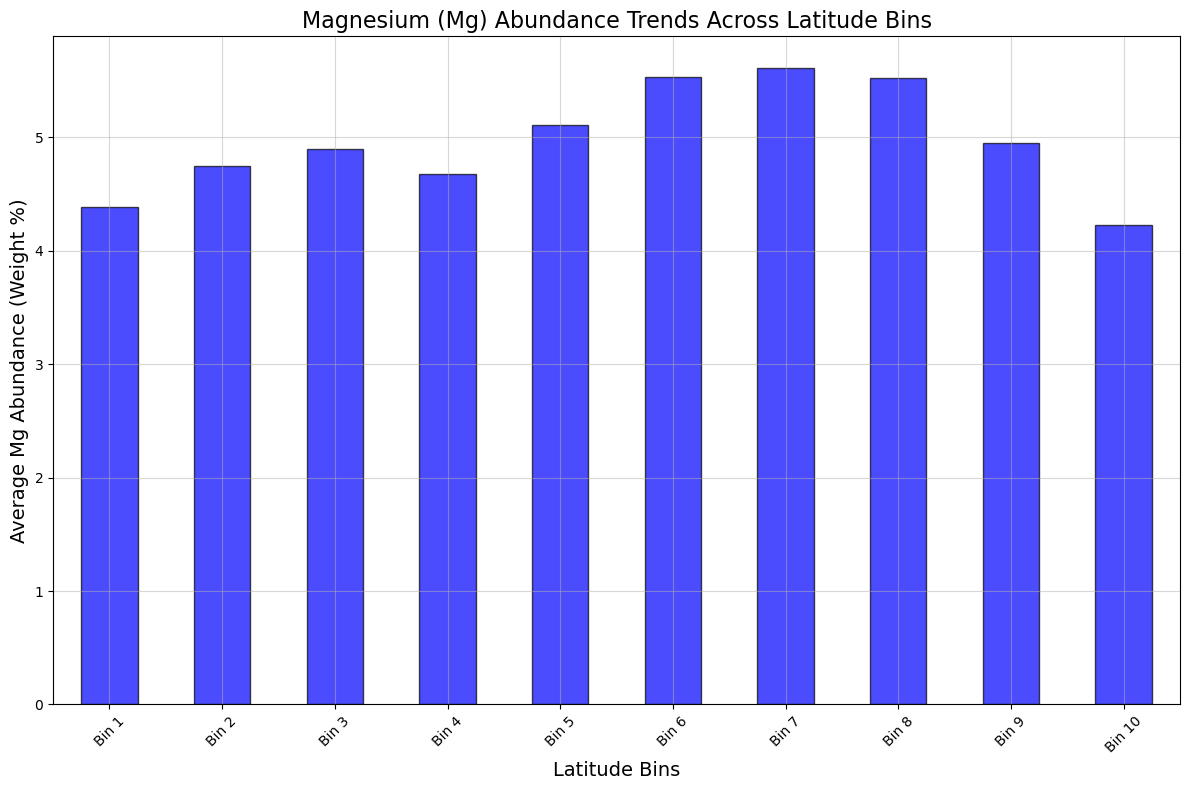

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded dataset
file_path = '/home/vijayaditya/Downloads/lunar_image_dimensions_km.csv'
data = pd.read_csv(file_path)

# Check if the required columns are present in the dataset
required_columns = ['V0_LATITUDE', 'MG_WT']
if all(col in data.columns for col in required_columns):
    # Extract latitude and magnesium abundance
    latitudes = data['V0_LATITUDE']
    mg_abundance = data['MG_WT']

    # Define latitude bins
    latitude_bins = pd.cut(latitudes, bins=10, labels=False)

    # Calculate mean Mg abundance for each latitude bin
    mg_trends_by_latitude = data.groupby(latitude_bins)['MG_WT'].mean()

    # Create a bar plot to visualize Mg trends across latitude bins
    plt.figure(figsize=(12, 8))
    mg_trends_by_latitude.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')

    # Add labels and title
    plt.title("Magnesium (Mg) Abundance Trends Across Latitude Bins", fontsize=16)
    plt.xlabel("Latitude Bins", fontsize=14)
    plt.ylabel("Average Mg Abundance (Weight %)", fontsize=14)
    plt.xticks(
        ticks=range(len(mg_trends_by_latitude)),
        labels=[f"Bin {i+1}" for i in range(len(mg_trends_by_latitude))],
        rotation=45,
    )
    plt.grid(alpha=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("The required columns (V0_LATITUDE, MG_WT) are not present in the dataset.")


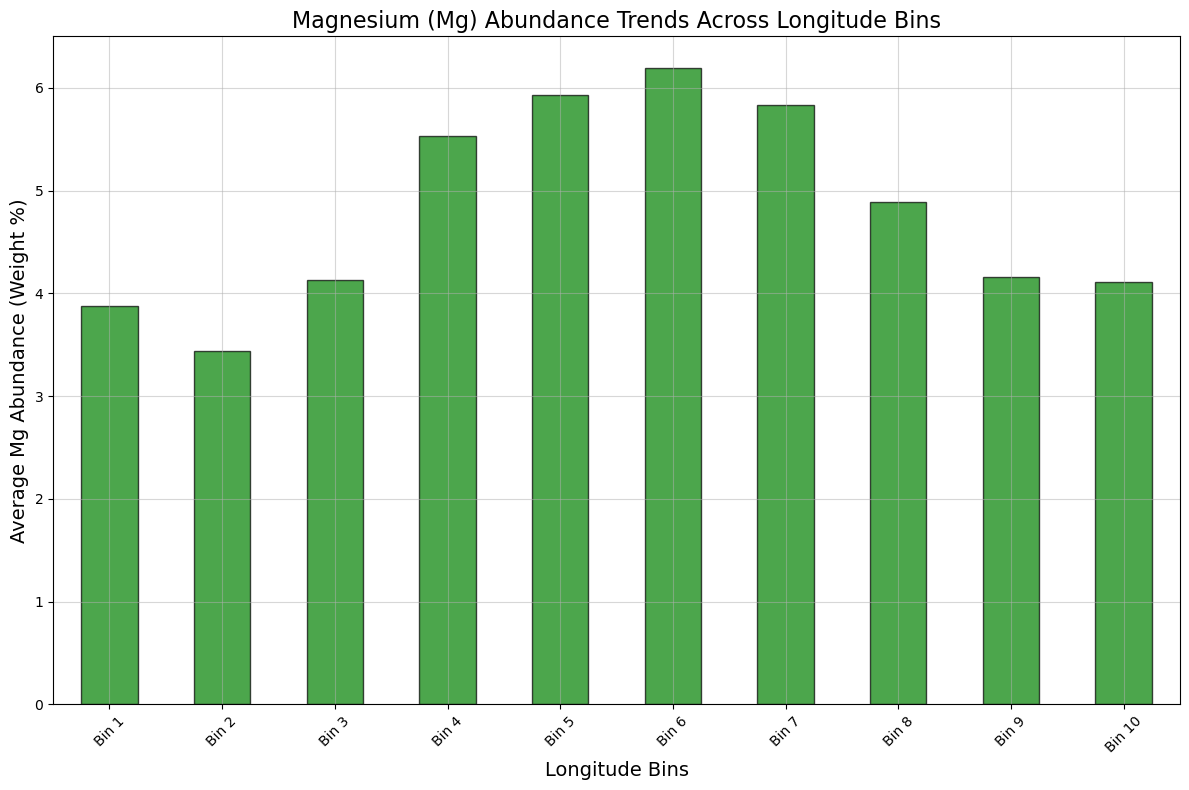

In [6]:
# Check if the required columns are present in the dataset
required_columns = ['V0_LONGITUDE', 'MG_WT']
if all(col in data.columns for col in required_columns):
    # Extract longitude and magnesium abundance
    longitudes = data['V0_LONGITUDE']
    mg_abundance = data['MG_WT']

    # Define longitude bins
    longitude_bins = pd.cut(longitudes, bins=10, labels=False)

    # Calculate mean Mg abundance for each longitude bin
    mg_trends_by_longitude = data.groupby(longitude_bins)['MG_WT'].mean()

    # Create a bar plot to visualize Mg trends across longitude bins
    plt.figure(figsize=(12, 8))
    mg_trends_by_longitude.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')

    # Add labels and title
    plt.title("Magnesium (Mg) Abundance Trends Across Longitude Bins", fontsize=16)
    plt.xlabel("Longitude Bins", fontsize=14)
    plt.ylabel("Average Mg Abundance (Weight %)", fontsize=14)
    plt.xticks(
        ticks=range(len(mg_trends_by_longitude)),
        labels=[f"Bin {i+1}" for i in range(len(mg_trends_by_longitude))],
        rotation=45,
    )
    plt.grid(alpha=0.5)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("The required columns (V0_LONGITUDE, MG_WT) are not present in the dataset.")


In [7]:
# Define bins for latitude and longitude
latitude_bins = pd.cut(latitudes, bins=10)
longitude_bins = pd.cut(longitudes, bins=10)

# Print the bin edges for latitude
print("Latitude Bin Edges:")
print(latitude_bins.cat.categories)

# Print the bin edges for longitude
print("\nLongitude Bin Edges:")
print(longitude_bins.cat.categories)


Latitude Bin Edges:
IntervalIndex([(-82.36, -65.207], (-65.207, -48.224], (-48.224, -31.241], (-31.241, -14.258], (-14.258, 2.725], (2.725, 19.708], (19.708, 36.691], (36.691, 53.674], (53.674, 70.657], (70.657, 87.64]], dtype='interval[float64, right]')

Longitude Bin Edges:
IntervalIndex([(-178.957, -142.86], (-142.86, -107.12], (-107.12, -71.38], (-71.38, -35.64], (-35.64, 0.1], (0.1, 35.84], (35.84, 71.58], (71.58, 107.32], (107.32, 143.06], (143.06, 178.8]], dtype='interval[float64, right]')


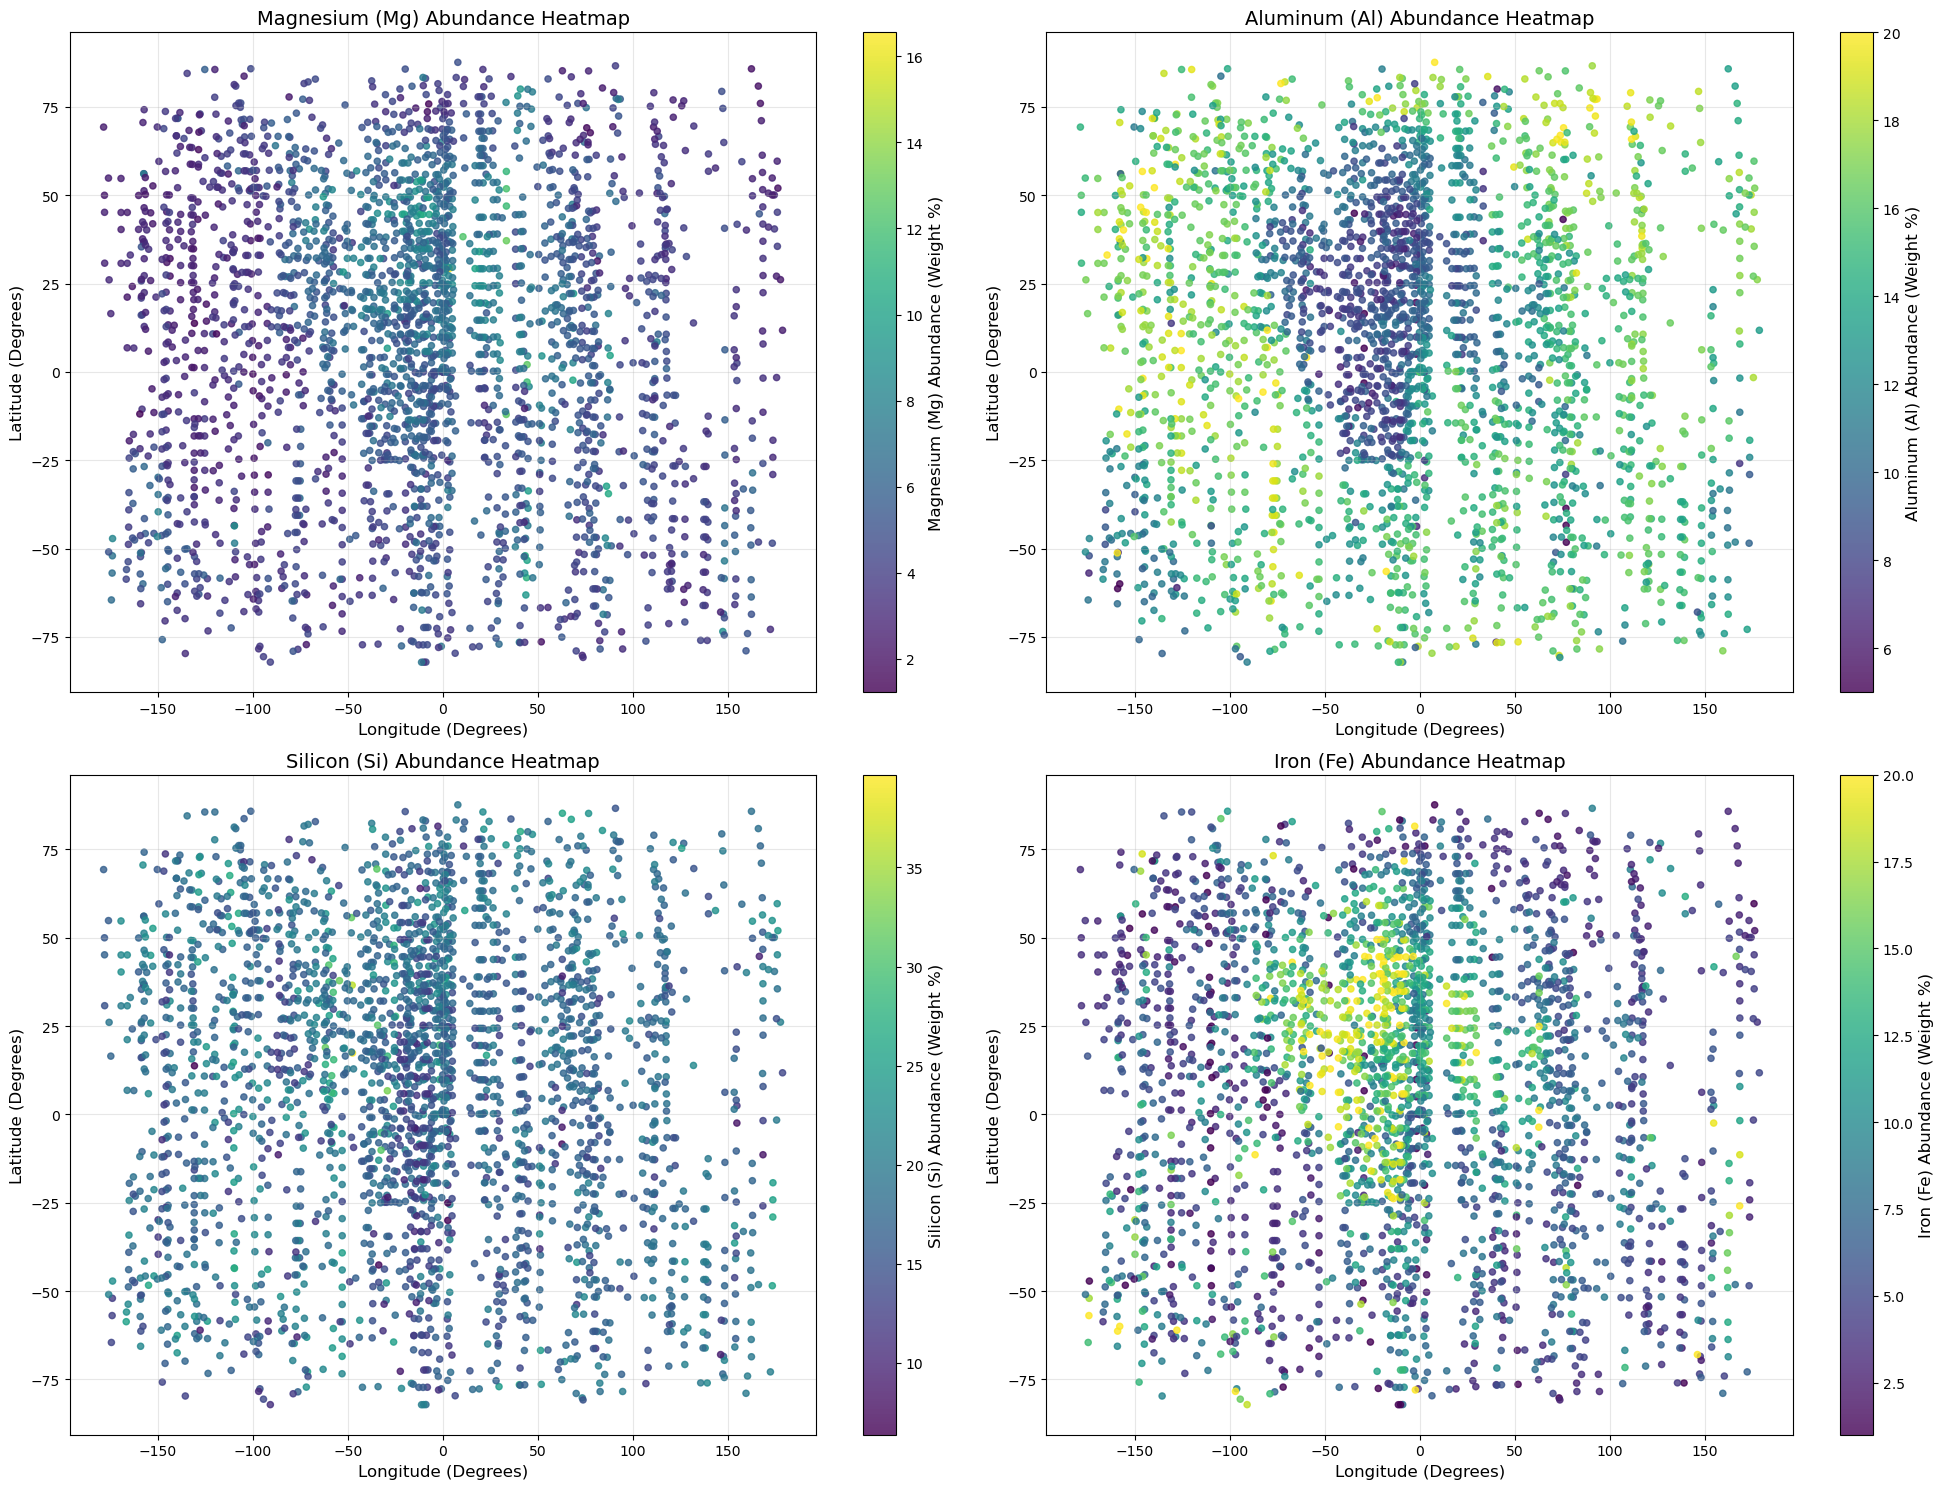

In [8]:
# List of elements to plot
elements = ['MG_WT', 'AL_WT', 'SI_WT', 'FE_WT']
titles = ["Magnesium (Mg)", "Aluminum (Al)", "Silicon (Si)", "Iron (Fe)"]
cmap = 'viridis'  # Colormap for the heatmaps

# Create a figure with subplots for each element
plt.figure(figsize=(20, 15))
for i, element in enumerate(elements):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of plots
    
    # Scatter plot for each element
    scatter = plt.scatter(data['V0_LONGITUDE'], data['V0_LATITUDE'], c=data[element], cmap=cmap, s=20, alpha=0.8)
    
    # Add colorbar and labels
    cbar = plt.colorbar(scatter)
    cbar.set_label(f'{titles[i]} Abundance (Weight %)', fontsize=12)
    plt.title(f"{titles[i]} Abundance Heatmap", fontsize=14)
    plt.xlabel("Longitude (Degrees)", fontsize=12)
    plt.ylabel("Latitude (Degrees)", fontsize=12)
    plt.grid(alpha=0.3)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


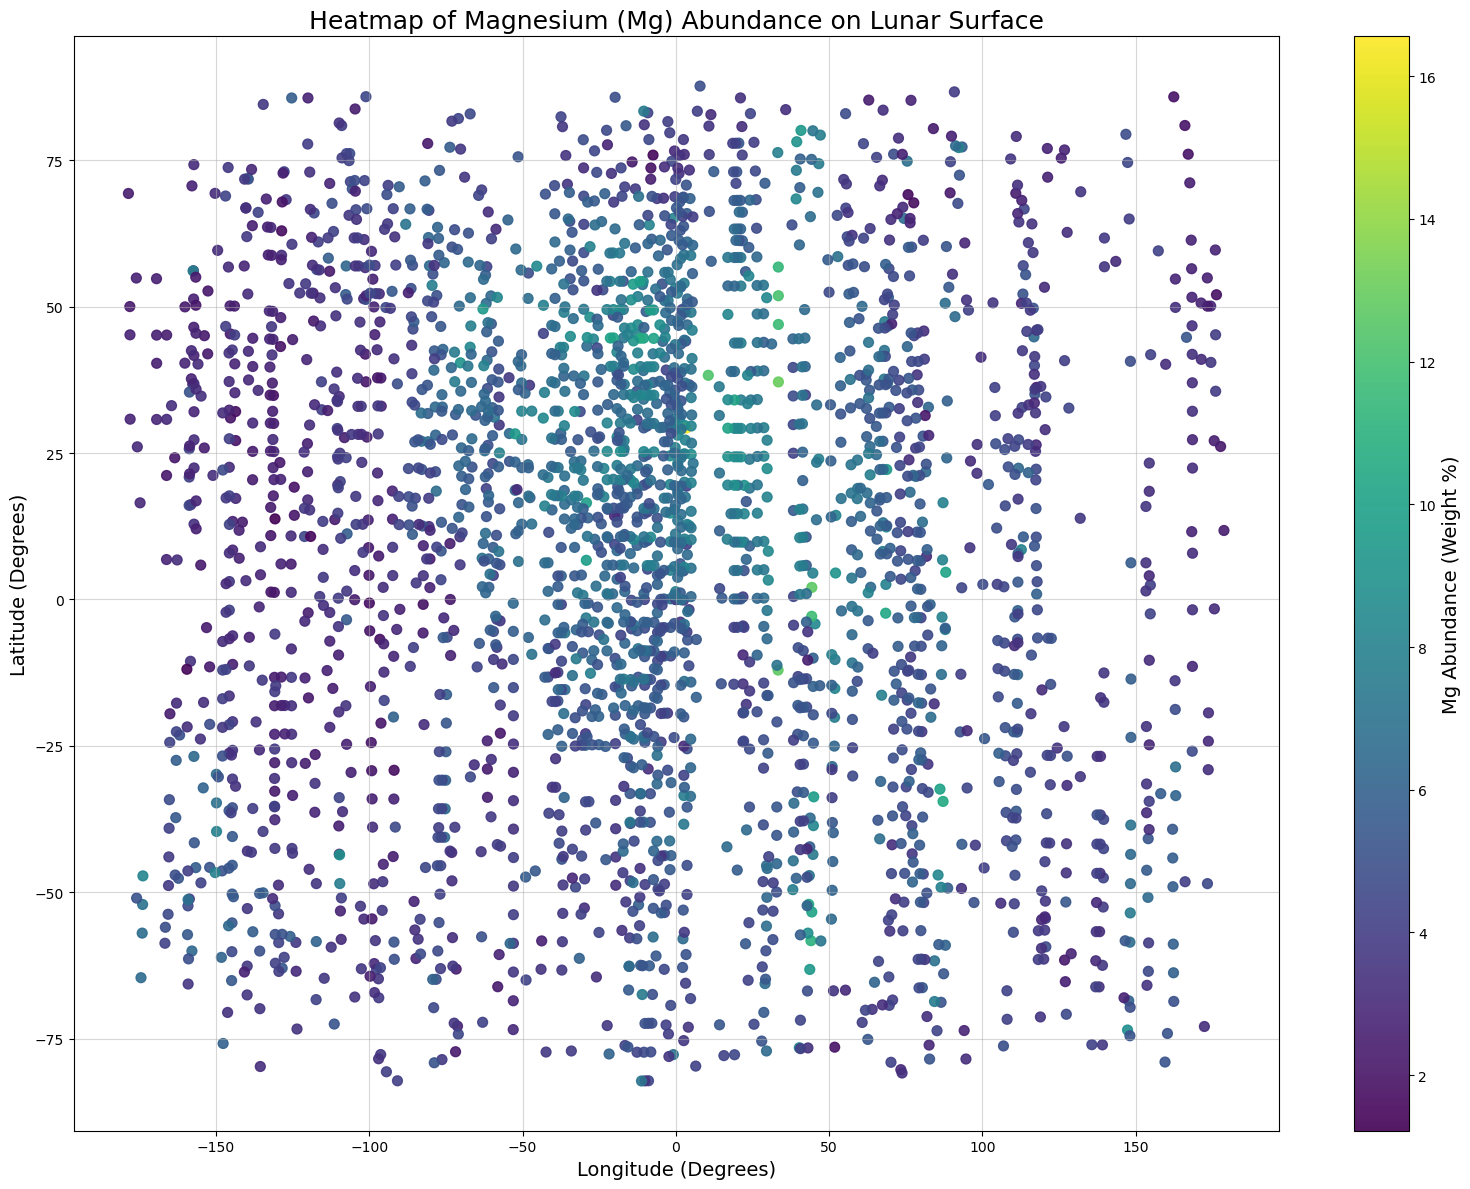

In [9]:
# Create a larger and clearer heatmap-like scatter plot
plt.figure(figsize=(16, 12))  # Increase figure size for better visualization
scatter = plt.scatter(longitudes, latitudes, c=mg_abundance, cmap='viridis', s=50, alpha=0.9)  # Increase point size

# Add colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label('Mg Abundance (Weight %)', fontsize=14)
plt.title("Heatmap of Magnesium (Mg) Abundance on Lunar Surface", fontsize=18)
plt.xlabel("Longitude (Degrees)", fontsize=14)
plt.ylabel("Latitude (Degrees)", fontsize=14)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
data_pixel


V0_LATITUDE  V0_LONGITUDE  V1_LATITUDE  V1_LONGITUDE  V2_LATITUDE  \
0          -44.76        120.40       -50.51        120.50       -50.49   
1          -54.45        120.57       -60.20        120.72       -60.17   
2          -59.29        120.69       -65.04        120.88       -65.01   
3           49.72        116.61        44.01        116.85        44.02   
4           44.83        116.82        39.11        117.01        39.13   
...           ...           ...          ...           ...          ...   
2717       -36.32       -117.79       -42.03       -117.88       -42.03   
2718       -31.39       -117.72       -37.09       -117.80       -37.10   
2719       -26.46       -117.67       -32.15       -117.74       -32.16   
2720       -39.60       -134.69       -45.30       -134.75       -45.30   
2721       -56.72       -138.02       -62.43       -138.17       -62.43   

      V2_LONGITUDE  V3_LATITUDE  V3_LONGITUDE  MG_WT  MG_FIT_UNC  ...  \
0           121.91       -44.74        121.66   4.09        0.20  ...   
1           122.53       -54.43        122.12   3.71        0.35  ...   
2           123.02       -59.27        122.45   4.81        0.58  ...   
3           117.99        49.74        117.88   5.09        1.62  ...   
4           118.07        44.85        117.97   6.40        1.59  ...   
...            ...          ...           ...    ...         ...  ...   
2717       -116.83       -36.33       -116.83   2.90        0.18  ...   
2718       -116.83       -31.40       -116.83   3.55        0.18  ...   
2719       -116.84       -26.46       -116.83   2.47        0.50  ...   
2720       -133.65       -39.60       -133.70   3.92        0.18  ...   
2721       -136.43       -56.72       -136.57   5.72        0.30  ...   

      SI_FIT_UNC  SI_SYS_UNC  SI_TOT_UNC  FE_WT  FE_FIT_UNC  FE_SYS_UNC  \
0           0.53        4.38        4.41   3.64        0.00         4.1   
1           0.66        4.38        4.43   3.04        0.00         4.1   
2           1.02        4.38        4.49   3.13        0.00         4.1   
3           2.76        4.38        5.18   3.24        0.00         4.1   
4           2.61        4.38        5.09   3.63        0.00         4.1   
...          ...         ...         ...    ...         ...         ...   
2717        0.78        4.38        4.45   6.27        0.57         4.1   
2718        0.70        4.38        4.43   8.17        0.52         4.1   
2719        4.24        4.38        6.09   5.07        0.84         4.1   
2720        0.61        4.38        4.42   5.26        0.43         4.1   
2721        0.98        4.38        4.48   9.96        0.78         4.1   

      FE_TOT_UNC   Width_km   Height_km     Area_km2  
0           4.10  30.853271  174.319122  5378.315131  
1           4.10  32.090215  174.319122  5593.938164  
2           4.10  32.996009  174.319122  5751.835245  
3           4.10  28.600503  173.106468  4950.932003  
4           4.10  28.170666  173.409631  4885.064733  
...          ...        ...         ...          ...  
2717        4.14  22.560985  173.106468  3905.452377  
2718        4.14  22.304013  172.803304  3854.207142  
2719        4.19  21.941906  172.500140  3784.981909  
2720        4.13  23.264214  172.803304  4020.133088  
2721        4.18  24.410498  173.106468  4225.615023  

[2722 rows x 27 columns]

In [12]:
df=data_pixel.copy()

In [13]:
len(df)

2722

In [16]:
len(df['V0_LATITUDE'].unique())

2448

In [17]:
for i in df.columns:
    print(len(df[i].unique()))

2448
2469
2434
2515
2422
2505
2436
2504
688
163
1
99
1108
303
1
155
1169
413
1
228
1281
326
1
169
2707
223
2707


In [ ]:
file = '/home/vijayaditya/Downloads/1-s2.0-S0019103523004773-mmc3.csv'
data_pixel = pd.read_csv(file_path_pixel)

In [4]:
# Load the newly uploaded file
file_path = '/home/vijayaditya/Downloads/Lunar_Image_Dataset_with_Dimensions_and_Area_in_Kilometers(2).csv'
data_new = pd.read_csv(file_path)
import matplotlib as plt

# Strip column names for consistent access
data_new.columns = data_new.columns.str.strip()

# Plot binned variation of the area in longitude and latitude
plt.figure(figsize=(12, 8))

# Create a 2D histogram (bins for longitude and latitude, color for area)
plt.hist2d(data_new['V0_LONGITUDE'], data_new['V0_LATITUDE'], bins=30, weights=data_new['Area_km2'], cmap='viridis')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Area (km²)', fontsize=12)

# Add labels and title
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Binned Variation of Area by Longitude and Latitude', fontsize=14)
plt.grid(alpha=0.3)

plt.show()


AttributeError: module 'matplotlib' has no attribute 'figure'

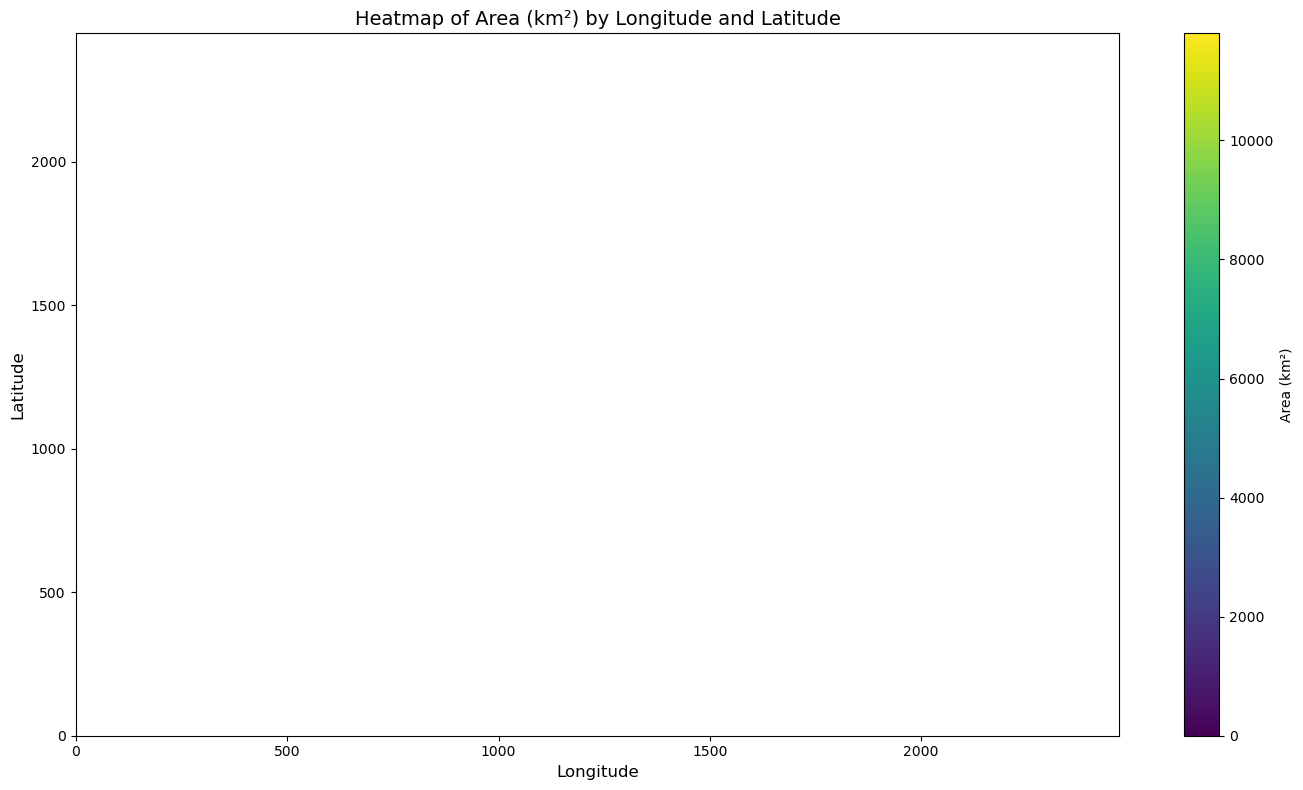

In [9]:
# Reload the file to ensure proper access
file_path = '/home/vijayaditya/Downloads/Lunar_Image_Dataset_with_Dimensions_and_Area_in_Kilometers(2).csv'
data_heatmap = pd.read_csv(file_path)

# Strip column names for consistency
data_heatmap.columns = data_heatmap.columns.str.strip()

# Create a pivot table for the heatmap
heatmap_data = data_heatmap.pivot_table(
    index='V0_LATITUDE',
    columns='V0_LONGITUDE',
    values='Area_km2'
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
plt.imshow(heatmap_data, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Area (km²)')

# Add labels and title
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Heatmap of Area (km²) by Longitude and Latitude', fontsize=14)
plt.tight_layout()
plt.show()


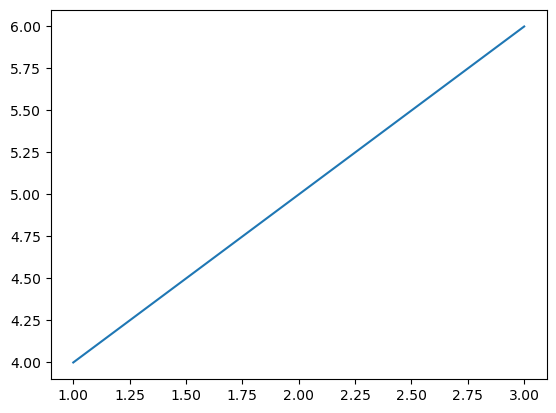

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([1, 2, 3], [4, 5, 6])
plt.show()


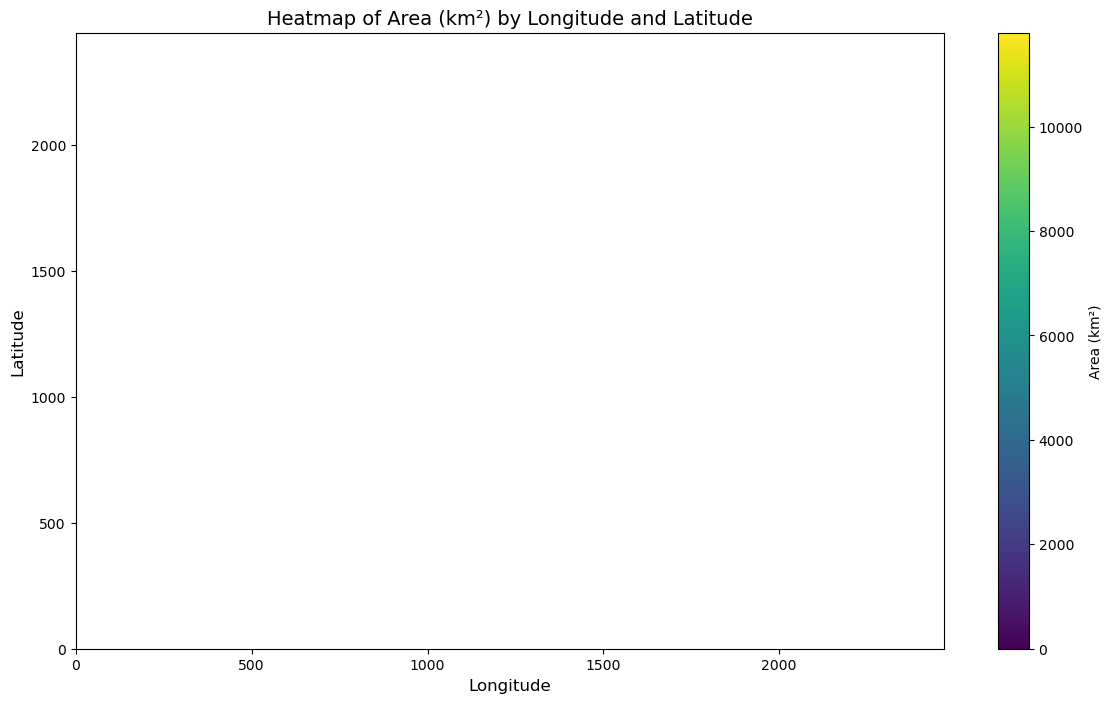

In [7]:
# Ensure data is loaded and structured properly
heatmap_data = data_heatmap.pivot_table(
    index='V0_LATITUDE',
    columns='V0_LONGITUDE',
    values='Area_km2'
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
plt.imshow(heatmap_data, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Area (km²)')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Heatmap of Area (km²) by Longitude and Latitude', fontsize=14)
plt.show()


/tmp/ipykernel_7416/543522756.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_by_longitude_bin = data.groupby('Longitude_Bin')['Area_km2'].mean()


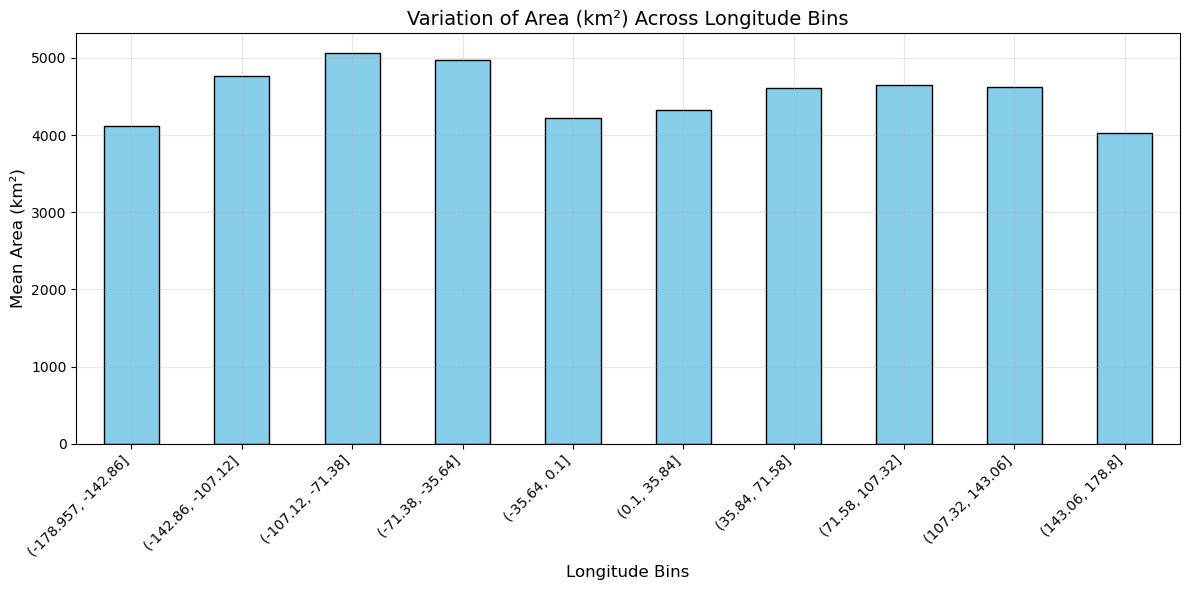

In [12]:
path = "/home/vijayaditya/Downloads/Lunar_Image_Dataset_with_Dimensions_and_Area_in_Kilometers(2).csv"  # Replace with your file path
data = pd.read_csv(path)

# Strip column names for consistency
data.columns = data.columns.str.strip()

# Create longitude bins and calculate the mean area in each bin
data['Longitude_Bin'] = pd.cut(data['V0_LONGITUDE'], bins=10)  # Divide longitude into 10 bins
area_by_longitude_bin = data.groupby('Longitude_Bin')['Area_km2'].mean()

# Plot the variations of area across longitude bins
plt.figure(figsize=(12, 6))
area_by_longitude_bin.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Longitude Bins', fontsize=12)
plt.ylabel('Mean Area (km²)', fontsize=12)
plt.title('Variation of Area (km²) Across Longitude Bins', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()


/tmp/ipykernel_7416/3109618005.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_by_latitude_bin = data.groupby('Latitude_Bin')['Area_km2'].mean()


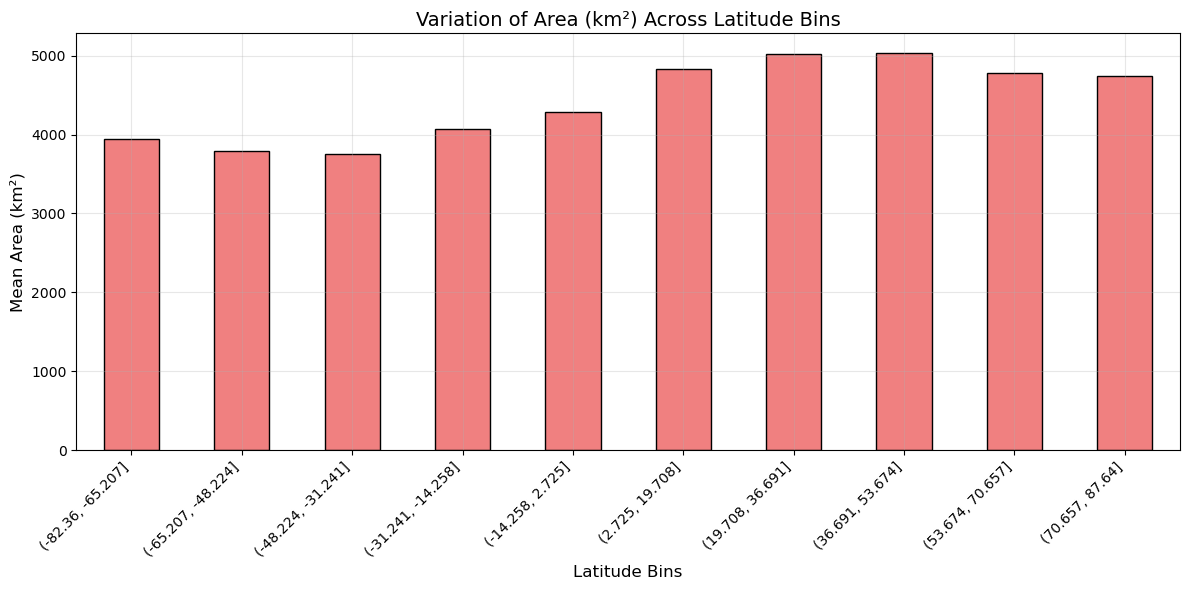

In [13]:


# Strip column names for consistency
data.columns = data.columns.str.strip()

# Create latitude bins and calculate the mean area in each bin
data['Latitude_Bin'] = pd.cut(data['V0_LATITUDE'], bins=10)  # Divide latitude into 10 bins
area_by_latitude_bin = data.groupby('Latitude_Bin')['Area_km2'].mean()

# Plot the variations of area across latitude bins
plt.figure(figsize=(12, 6))
area_by_latitude_bin.plot(kind='bar', color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Latitude Bins', fontsize=12)
plt.ylabel('Mean Area (km²)', fontsize=12)
plt.title('Variation of Area (km²) Across Latitude Bins', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()


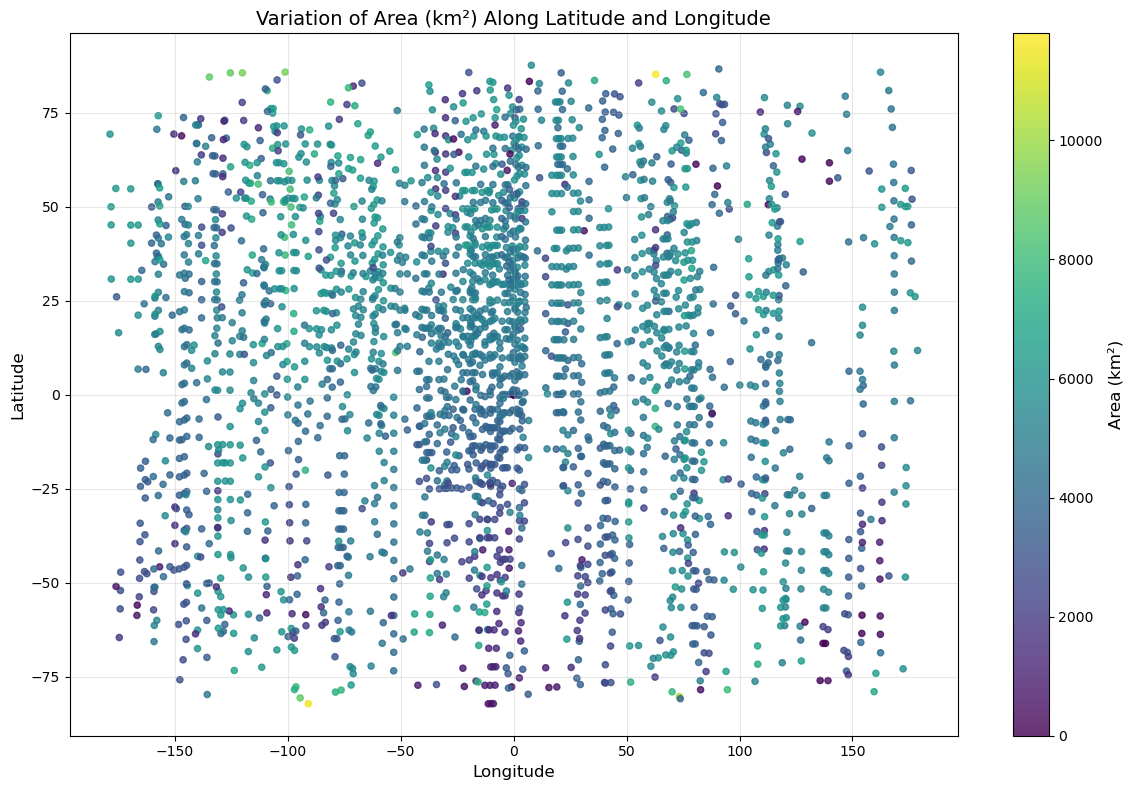

In [14]:


# Strip column names for consistency
data.columns = data.columns.str.strip()

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['V0_LONGITUDE'], data['V0_LATITUDE'], c=data['Area_km2'], cmap='viridis', s=20, alpha=0.8)

# Add a colorbar to represent area values
cbar = plt.colorbar(scatter)
cbar.set_label('Area (km²)', fontsize=12)

# Add labels and title
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Variation of Area (km²) Along Latitude and Longitude', fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [15]:
data.head()

V0_LATITUDE  V0_LONGITUDE  V1_LATITUDE  V1_LONGITUDE  V2_LATITUDE  \
0       -44.76        120.40       -50.51        120.50       -50.49   
1       -54.45        120.57       -60.20        120.72       -60.17   
2       -59.29        120.69       -65.04        120.88       -65.01   
3        49.72        116.61        44.01        116.85        44.02   
4        44.83        116.82        39.11        117.01        39.13   

   V2_LONGITUDE  V3_LATITUDE  V3_LONGITUDE  MG_WT  MG_FIT_UNC  ...  \
0        121.91       -44.74        121.66   4.09        0.20  ...   
1        122.53       -54.43        122.12   3.71        0.35  ...   
2        123.02       -59.27        122.45   4.81        0.58  ...   
3        117.99        49.74        117.88   5.09        1.62  ...   
4        118.07        44.85        117.97   6.40        1.59  ...   

   SI_TOT_UNC  FE_WT  FE_FIT_UNC  FE_SYS_UNC  FE_TOT_UNC   Width_km  \
0        4.41   3.64         0.0         4.1         4.1  30.853271   
1        4.43   3.04         0.0         4.1         4.1  32.090215   
2        4.49   3.13         0.0         4.1         4.1  32.996009   
3        5.18   3.24         0.0         4.1         4.1  28.600503   
4        5.09   3.63         0.0         4.1         4.1  28.170666   

    Height_km     Area_km2     Longitude_Bin        Latitude_Bin  
0  174.319122  5378.315131  (107.32, 143.06]  (-48.224, -31.241]  
1  174.319122  5593.938164  (107.32, 143.06]  (-65.207, -48.224]  
2  174.319122  5751.835245  (107.32, 143.06]  (-65.207, -48.224]  
3  173.106468  4950.932003  (107.32, 143.06]    (36.691, 53.674]  
4  173.409631  4885.064733  (107.32, 143.06]    (36.691, 53.674]  

[5 rows x 29 columns]

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the newly uploaded file
file_path = '/home/vijayaditya/Downloads/Lunar_Image_Dataset_with_Dimensions_and_Area_in_Kilometers(2).csv'
data = pd.read_csv(file_path)

# Strip column names for consistency
data.columns = data.columns.str.strip()

# Define the Moon's radius in kilometers
moon_radius_km = 1737  # kilometers

# Define the Haversine formula for distance calculation
def haversine(lat1, lon1, lat2, lon2, radius=moon_radius_km):
    """
    Calculate the great-circle distance between two points on a sphere using the Haversine formula.
    """
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = radius * c
    return distance

# Convert longitude and latitude to distances in kilometers
# Calculate width (longitude-based) and height (latitude-based) for each row
data['Width_km'] = data.apply(lambda row: haversine(row['V0_LATITUDE'], row['V0_LONGITUDE'], 
                                                   row['V0_LATITUDE'], row['V2_LONGITUDE']), axis=1)
data['Height_km'] = data.apply(lambda row: haversine(row['V0_LATITUDE'], row['V0_LONGITUDE'], 
                                                    row['V1_LATITUDE'], row['V0_LONGITUDE']), axis=1)

# Display the updated dataset with width and height in kilometers
import ace_tools as tools; tools.display_dataframe_to_user(name="Lunar Dataset with Haversine-Based Dimensions", dataframe=data)


ModuleNotFoundError: No module named 'ace_tools'

In [20]:
import pandas as pd
import numpy as np

# Load your dataset
file_path = "/home/vijayaditya/Downloads/Lunar_Image_Dataset_with_Dimensions_and_Area_in_Kilometers(2).csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Strip column names for consistency
data.columns = data.columns.str.strip()

# Define the Moon's radius in kilometers
moon_radius_km = 1737  # kilometers

# Define the Haversine formula for distance calculation
def haversine(lat1, lon1, lat2, lon2, radius=moon_radius_km):
    """
    Calculate the great-circle distance between two points on a sphere using the Haversine formula.
    """
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = radius * c
    return distance

# Convert longitude and latitude to distances in kilometers
data['Width_km_1'] = data.apply(lambda row: haversine(row['V0_LATITUDE'], row['V0_LONGITUDE'], 
                                                   row['V0_LATITUDE'], row['V2_LONGITUDE']), axis=1)
data['Height_km_1'] = data.apply(lambda row: haversine(row['V0_LATITUDE'], row['V0_LONGITUDE'], 
                                                    row['V1_LATITUDE'], row['V0_LONGITUDE']), axis=1)

# Save the updated dataset
output_file_path = "/home/vijayaditya/Downloads/output_with_haversine_distances.csv"
data.to_csv(output_file_path, index=False)

# Display message
print(f"Updated dataset saved to {output_file_path}")


Updated dataset saved to /home/vijayaditya/Downloads/output_with_haversine_distances.csv


In [25]:
import pandas as pd
import numpy as np
from shapely.geometry import Polygon, Point

# Load the uploaded data file
file_path = '/home/vijayaditya/Downloads/1-s2.0-S0019103523004773-mmc3.csv'
data = pd.read_csv(file_path)

# Strip leading and trailing spaces from the column names
data.columns = data.columns.str.strip()

# Define grid resolution (1x1 degrees for latitude and longitude)
grid_resolution = 1

# Create empty lists to hold grid points and their corresponding abundance values
grid_points = []
grid_values = []

# Iterate over each row to process polygons and fill the grid
for _, row in data.iterrows():
    # Create the polygon for the current row
    polygon_coords = [
        (row['V0_LONGITUDE'], row['V0_LATITUDE']),
        (row['V1_LONGITUDE'], row['V1_LATITUDE']),
        (row['V2_LONGITUDE'], row['V2_LATITUDE']),
        (row['V3_LONGITUDE'], row['V3_LATITUDE'])
    ]
    polygon = Polygon(polygon_coords)
    
    # Define the bounding box of the polygon
    min_lon, min_lat, max_lon, max_lat = polygon.bounds
    
    # Generate grid points within the bounding box
    lon_range = np.arange(np.floor(min_lon), np.ceil(max_lon), grid_resolution)
    lat_range = np.arange(np.floor(min_lat), np.ceil(max_lat), grid_resolution)
    
    for lon in lon_range:
        for lat in lat_range:
            grid_point = Point(lon, lat)
            if polygon.contains(grid_point):
                # Assign the abundance value (MG_WT) to the grid point
                grid_points.append((lon, lat))
                grid_values.append(row['MG_WT'])

# Convert grid points and values to a DataFrame for visualization or export
grid_data = pd.DataFrame(grid_points, columns=['Longitude', 'Latitude'])
grid_data['MG_WT'] = grid_values

# Save the grid data to a CSV file for further use
grid_data_path = "/home/vijayaditya/Downloads/grid_data_1x1.csv"
grid_data.to_csv(grid_data_path, index=False)

# Confirm the path to the saved grid data
grid_data_path


ModuleNotFoundError: No module named 'shapely'

In [23]:
!pip install shapely



error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

# Load the uploaded data file
file_path = '/home/vijayaditya/Downloads/1-s2.0-S0019103523004773-mmc3.csv'
data = pd.read_csv(file_path)

# Treat missing values as 0
data.fillna(0, inplace=True)

# Strip leading and trailing spaces from the column names
data.columns = data.columns.str.strip()

# Define grid resolution
grid_resolution = 0.5  # Example grid size in degrees

# Create empty lists to hold grid points and their corresponding abundance values
grid_points = []
grid_values = []

# Determine the bounding box of the data
min_lon = data[['V0_LONGITUDE', 'V1_LONGITUDE', 'V2_LONGITUDE', 'V3_LONGITUDE']].min().min()
max_lon = data[['V0_LONGITUDE', 'V1_LONGITUDE', 'V2_LONGITUDE', 'V3_LONGITUDE']].max().max()
min_lat = data[['V0_LATITUDE', 'V1_LATITUDE', 'V2_LATITUDE', 'V3_LATITUDE']].min().min()
max_lat = data[['V0_LATITUDE', 'V1_LATITUDE', 'V2_LATITUDE', 'V3_LATITUDE']].max().max()

# Generate grid points
lon_range = np.arange(min_lon, max_lon, grid_resolution)
lat_range = np.arange(min_lat, max_lat, grid_resolution)

# Initialize a grid to hold values
grid_data = np.zeros((len(lat_range), len(lon_range)))

# Loop through each polygon and fill the grid
for _, row in data.iterrows():
    # Create a polygon from the vertex coordinates
    polygon_coords = [
        (row['V0_LONGITUDE'], row['V0_LATITUDE']),
        (row['V1_LONGITUDE'], row['V1_LATITUDE']),
        (row['V2_LONGITUDE'], row['V2_LATITUDE']),
        (row['V3_LONGITUDE'], row['V3_LATITUDE']),
    ]
    polygon = Polygon(polygon_coords)
    
    # Fill the grid cells that overlap with the polygon
    for i, lon in enumerate(lon_range):
        for j, lat in enumerate(lat_range):
            grid_point = Point(lon, lat)
            if polygon.contains(grid_point):
                grid_data[j, i] += row['MG_WT']

# Plot the resulting grid as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(grid_data, extent=[min_lon, max_lon, min_lat, max_lat], origin='lower', cmap='viridis')
plt.colorbar(label='MG_WT Abundance')
plt.title('Gridded MG_WT Abundance from Polygons')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(alpha=0.5)
plt.show()

# Save the grid data as a NumPy array for further processing
grid_output_path = "/home/vijayaditya/Downloads/mg_wt_gridded.npy"
np.save(grid_output_path, grid_data)

# Provide the path for download
grid_output_path

In [ ]:
# Break down the steps to debug and handle any issues
try:
    # Verify data consistency
    if data.isnull().values.any():
        print("Data contains missing values. These will be treated as 0.")
        data.fillna(0, inplace=True)
    
    # Validate polygon coordinates
    invalid_polygons = data[
        (data[['V0_LONGITUDE', 'V1_LONGITUDE', 'V2_LONGITUDE', 'V3_LONGITUDE']].isnull().any(axis=1)) |
        (data[['V0_LATITUDE', 'V1_LATITUDE', 'V2_LATITUDE', 'V3_LATITUDE']].isnull().any(axis=1))
    ]
    if not invalid_polygons.empty:
        print("Invalid polygons detected. Removing these entries.")
        data.drop(index=invalid_polygons.index, inplace=True)

    # Define grid resolution again to ensure consistency
    grid_resolution = 0.5  # Example grid size in degrees

    # Generate ranges for latitude and longitude
    lon_range = np.arange(min_lon, max_lon, grid_resolution)
    lat_range = np.arange(min_lat, max_lat, grid_resolution)

    # Initialize a grid to hold values
    grid_data = np.zeros((len(lat_range), len(lon_range)))

    # Process polygons and fill the grid
    for _, row in data.iterrows():
        polygon_coords = [
            (row['V0_LONGITUDE'], row['V0_LATITUDE']),
            (row['V1_LONGITUDE'], row['V1_LATITUDE']),
            (row['V2_LONGITUDE'], row['V2_LATITUDE']),
            (row['V3_LONGITUDE'], row['V3_LATITUDE']),
        ]
        polygon = Polygon(polygon_coords)
        
        for i, lon in enumerate(lon_range):
            for j, lat in enumerate(lat_range):
                grid_point = Point(lon, lat)
                if polygon.contains(grid_point):
                    grid_data[j, i] += row['MG_WT']

    # Plot the resulting grid
    plt.figure(figsize=(12, 8))
    plt.imshow(grid_data, extent=[min_lon, max_lon, min_lat, max_lat], origin='lower', cmap='viridis')
    plt.colorbar(label='MG_WT Abundance')
    plt.title('Gridded MG_WT Abundance from Polygons')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(alpha=0.5)
    plt.show()

    # Save the grid data
    grid_output_path = "/mnt/data/mg_wt_gridded.npy"
    np.save(grid_output_path, grid_data)
    print(f"Grid data saved to {grid_output_path}")
except Exception as e:
    print(f"An error occurred: {e}")
